In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
##zipcodes = gpd.read_file('../data/zipcodes.geojson')
#print(zipcodes.crs)
##zipcodes.head( )

better_health = gpd.read_file('../data/Better_Health_Data_2024_release_20241202.geojson')
##print(better_health)
better_health.head(2)

,measure,low_confidence_limit,data_value_unit,data_value,short_question_text,statedesc,totalpop18plus,locationid,year,high_confidence_limit,...,data_value_footnote,data_value_type,data_value_footnote_symbol,locationname,category,datavaluetypeid,measureid,datasource,totalpopulation,geometry
0,Diagnosed diabetes among adults,11.8,%,12.0,Diabetes,United States,260836730,59,2022,12.2,...,None,Crude prevalence,None,None,Health Outcomes,CrdPrv,DIABETES,BRFSS,333287557,None
1,Hearing disability among adults,8.5,%,9.6,Hearing Disability,Alabama,19675,01005,2022,10.7,...,None,Crude prevalence,None,Barbour,Disability,CrdPrv,HEARING,BRFSS,24706,POINT (-85.39281 31.86982)


In [3]:
better_health.tail(2)

,measure,low_confidence_limit,data_value_unit,data_value,short_question_text,statedesc,totalpop18plus,locationid,year,high_confidence_limit,...,data_value_footnote,data_value_type,data_value_footnote_symbol,locationname,category,datavaluetypeid,measureid,datasource,totalpopulation,geometry
240884,Self-care disability among adults,2.9,%,3.2,Self-care Disability,Wisconsin,107333,55073,2022,3.5,...,None,Crude prevalence,None,Marathon,Disability,CrdPrv,SELFCARE,BRFSS,137958,POINT (-89.75886 44.89830)
240885,Binge drinking among adults,13.5,%,16.4,Binge Drinking,Wyoming,29818,56013,2022,19.5,...,None,Crude prevalence,None,Fremont,Health Risk Behaviors,CrdPrv,BINGE,BRFSS,39472,POINT (-108.63045 43.04064)


In [4]:
better_health.columns

Index(['measure', 'low_confidence_limit', 'data_value_unit', 'data_value',
       'short_question_text', 'statedesc', 'totalpop18plus', 'locationid',
       'year', 'high_confidence_limit', 'categoryid', 'stateabbr',
       'data_value_footnote', 'data_value_type', 'data_value_footnote_symbol',
       'locationname', 'category', 'datavaluetypeid', 'measureid',
       'datasource', 'totalpopulation', 'geometry'],
      dtype='object')

In [5]:
better_health_df1=better_health.drop(columns =['low_confidence_limit','locationid','high_confidence_limit',
                                               'data_value_footnote','data_value_footnote_symbol', 'data_value_type', 'datavaluetypeid',
                                               'measureid', 'datasource'])
better_health_df1.head(2)          


,measure,data_value_unit,data_value,short_question_text,statedesc,totalpop18plus,year,categoryid,stateabbr,locationname,category,totalpopulation,geometry
0,Diagnosed diabetes among adults,%,12.0,Diabetes,United States,260836730,2022,HLTHOUT,US,None,Health Outcomes,333287557,None
1,Hearing disability among adults,%,9.6,Hearing Disability,Alabama,19675,2022,DISABLT,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)


In [6]:
better_health_df1['short_question_text']=better_health_df1['short_question_text'].astype(str)
better_health_df1.head(2)

,measure,data_value_unit,data_value,short_question_text,statedesc,totalpop18plus,year,categoryid,stateabbr,locationname,category,totalpopulation,geometry
0,Diagnosed diabetes among adults,%,12.0,Diabetes,United States,260836730,2022,HLTHOUT,US,None,Health Outcomes,333287557,None
1,Hearing disability among adults,%,9.6,Hearing Disability,Alabama,19675,2022,DISABLT,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)


In [7]:
type(better_health_df1)

geopandas.geodataframe.GeoDataFrame

In [8]:
better_health_df1.shape

(240886, 13)

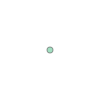

In [9]:
better_health_df1.loc[1,'geometry']

In [10]:
print(better_health_df1.loc[1, 'geometry'])

POINT (-85.3928136383141 31.8698172860413)


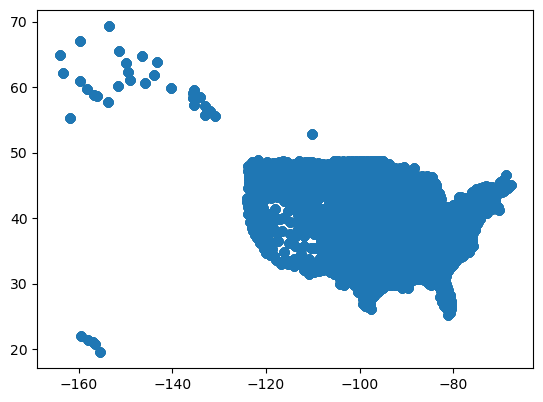

In [11]:
better_health_df1.plot();

In [12]:
better_health_df1.head()

,measure,data_value_unit,data_value,short_question_text,statedesc,totalpop18plus,year,categoryid,stateabbr,locationname,category,totalpopulation,geometry
0,Diagnosed diabetes among adults,%,12.0,Diabetes,United States,260836730,2022,HLTHOUT,US,None,Health Outcomes,333287557,None
1,Hearing disability among adults,%,9.6,Hearing Disability,Alabama,19675,2022,DISABLT,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)
2,Stroke among adults,%,3.7,Stroke,Alabama,91336,2022,HLTHOUT,AL,Calhoun,Health Outcomes,115788,POINT (-85.82577 33.77149)
3,Stroke among adults,%,5.6,Stroke,Alabama,27025,2022,HLTHOUT,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417)
4,Stroke among adults,%,5.3,Stroke,Alabama,11235,2022,HLTHOUT,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931)


In [13]:
#better_health_df1_state=better_health_df1.statedesc.value_counts().to_frame().reset_index()
#better_health_df1_state

In [14]:
better_health_df1=better_health_df1.rename(columns={'measure':'Measure','data_value':'Data','short_question_text': 'Category','statedesc':'State', 'totalpop18plus': '18plus', 'year':'Year',
                                  'categoryid':'Category_ID','stateabbr': 'St_Abbr','locationname': 'Location', 'category':'Group',
                                  'totalpopulation':'Population','geometry':'Geometry'})
better_health_df1.head(2)


,Measure,data_value_unit,Data,Category,State,18plus,Year,Category_ID,St_Abbr,Location,Group,Population,Geometry
0,Diagnosed diabetes among adults,%,12.0,Diabetes,United States,260836730,2022,HLTHOUT,US,None,Health Outcomes,333287557,None
1,Hearing disability among adults,%,9.6,Hearing Disability,Alabama,19675,2022,DISABLT,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)


In [15]:
better_health_df1.Category.value_counts()

Category
Diabetes                            6290
Hearing Disability                  6290
Stroke                              6290
Short Sleep Duration                6290
Cancer (non-skin) or Melanoma       6290
Frequent Physical Distress          6290
Health Insurance                    6290
Current Asthma                      6290
Arthritis                           6290
Cognitive Disability                6290
Mobility Disability                 6290
Any Disability                      6290
Depression                          6290
Obesity                             6290
Binge Drinking                      6290
Annual Checkup                      6290
Coronary Heart Disease              6290
COPD                                6290
Mammography                         6290
Self-care Disability                6290
Vision Disability                   6290
Frequent Mental Distress            6290
Independent Living Disability       6290
All Teeth Lost                      6290
General

In [16]:
better_health_df1['Data']=better_health_df1['Data'].astype(float)
better_health_df1.head(2)

,Measure,data_value_unit,Data,Category,State,18plus,Year,Category_ID,St_Abbr,Location,Group,Population,Geometry
0,Diagnosed diabetes among adults,%,12.0,Diabetes,United States,260836730,2022,HLTHOUT,US,None,Health Outcomes,333287557,None
1,Hearing disability among adults,%,9.6,Hearing Disability,Alabama,19675,2022,DISABLT,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)


In [17]:
better_health_df1['Population']=better_health_df1['Population'].astype(int)
better_health_df1.head(2)

,Measure,data_value_unit,Data,Category,State,18plus,Year,Category_ID,St_Abbr,Location,Group,Population,Geometry
0,Diagnosed diabetes among adults,%,12.0,Diabetes,United States,260836730,2022,HLTHOUT,US,None,Health Outcomes,333287557,None
1,Hearing disability among adults,%,9.6,Hearing Disability,Alabama,19675,2022,DISABLT,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)


In [18]:
better_health_df1['Total'] =((better_health_df1.Population * better_health_df1.Data)/100).astype('int')
better_health_df1.head(2)

,Measure,data_value_unit,Data,Category,State,18plus,Year,Category_ID,St_Abbr,Location,Group,Population,Geometry,Total
0,Diagnosed diabetes among adults,%,12.0,Diabetes,United States,260836730,2022,HLTHOUT,US,None,Health Outcomes,333287557,None,39994506
1,Hearing disability among adults,%,9.6,Hearing Disability,Alabama,19675,2022,DISABLT,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982),2371


In [19]:
better_health_df1_Stroke = better_health_df1.loc[better_health_df1['Category'] == 'Stroke'].reset_index(drop=True).round()
better_health_df1_Stroke.head()

,Measure,data_value_unit,Data,Category,State,18plus,Year,Category_ID,St_Abbr,Location,Group,Population,Geometry,Total
0,Stroke among adults,%,4.0,Stroke,Alabama,91336,2022,HLTHOUT,AL,Calhoun,Health Outcomes,115788,POINT (-85.82577 33.77149),4284
1,Stroke among adults,%,6.0,Stroke,Alabama,27025,2022,HLTHOUT,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417),1908
2,Stroke among adults,%,5.0,Stroke,Alabama,11235,2022,HLTHOUT,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931),752
3,Stroke among adults,%,5.0,Stroke,Alabama,28171,2022,HLTHOUT,AL,Dallas,Health Outcomes,36767,POINT (-87.10652 32.32583),1911
4,Stroke among adults,%,4.0,Stroke,Arkansas,46441,2022,HLTHOUT,AR,Crawford,Health Outcomes,61075,POINT (-94.24242 35.58843),2748


In [20]:
better_health_df1_Stroke.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Measure          6290 non-null   object  
 1   data_value_unit  6290 non-null   object  
 2   Data             6290 non-null   float64 
 3   Category         6290 non-null   object  
 4   State            6290 non-null   object  
 5   18plus           6290 non-null   object  
 6   Year             6290 non-null   object  
 7   Category_ID      6290 non-null   object  
 8   St_Abbr          6290 non-null   object  
 9   Location         6288 non-null   object  
 10  Group            6290 non-null   object  
 11  Population       6290 non-null   int64   
 12  Geometry         6288 non-null   geometry
 13  Total            6290 non-null   int64   
dtypes: float64(1), geometry(1), int64(2), object(10)
memory usage: 688.1+ KB


In [21]:
#candy_df['Name']=candy_df['Name'].astype(str)
#candy_df.head()
#better_health_df1_Stroke['Data']=better_health_df1_Stroke['Data'].astype(float)
better_health_df1_Stroke.head()

,Measure,data_value_unit,Data,Category,State,18plus,Year,Category_ID,St_Abbr,Location,Group,Population,Geometry,Total
0,Stroke among adults,%,4.0,Stroke,Alabama,91336,2022,HLTHOUT,AL,Calhoun,Health Outcomes,115788,POINT (-85.82577 33.77149),4284
1,Stroke among adults,%,6.0,Stroke,Alabama,27025,2022,HLTHOUT,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417),1908
2,Stroke among adults,%,5.0,Stroke,Alabama,11235,2022,HLTHOUT,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931),752
3,Stroke among adults,%,5.0,Stroke,Alabama,28171,2022,HLTHOUT,AL,Dallas,Health Outcomes,36767,POINT (-87.10652 32.32583),1911
4,Stroke among adults,%,4.0,Stroke,Arkansas,46441,2022,HLTHOUT,AR,Crawford,Health Outcomes,61075,POINT (-94.24242 35.58843),2748


In [22]:
#better_health_df1_Stroke['Population']=better_health_df1_Stroke['Population'].astype(int)
#better_health_df1_Stroke.head(2)

In [23]:
better_health_df1_Stroke.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Measure          6290 non-null   object  
 1   data_value_unit  6290 non-null   object  
 2   Data             6290 non-null   float64 
 3   Category         6290 non-null   object  
 4   State            6290 non-null   object  
 5   18plus           6290 non-null   object  
 6   Year             6290 non-null   object  
 7   Category_ID      6290 non-null   object  
 8   St_Abbr          6290 non-null   object  
 9   Location         6288 non-null   object  
 10  Group            6290 non-null   object  
 11  Population       6290 non-null   int64   
 12  Geometry         6288 non-null   geometry
 13  Total            6290 non-null   int64   
dtypes: float64(1), geometry(1), int64(2), object(10)
memory usage: 688.1+ KB


In [24]:
Stroke=better_health_df1_Stroke[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index()
Stroke.head(11)                                                                              

,State,Total
0,United States,22330266
1,California,2361339
2,Texas,1978554
3,Florida,1638489
4,New York,1233443
5,Pennsylvania,871951
6,Ohio,835105
7,Illinois,795514
8,Georgia,783704
9,North Carolina,755536


In [25]:
better_health_df1_Diabetes = better_health_df1.loc[better_health_df1['Category'] =='Diabetes'].reset_index(drop=True)
better_health_df1_Diabetes.head()

,Measure,data_value_unit,Data,Category,State,18plus,Year,Category_ID,St_Abbr,Location,Group,Population,Geometry,Total
0,Diagnosed diabetes among adults,%,12.0,Diabetes,United States,260836730,2022,HLTHOUT,US,None,Health Outcomes,333287557,None,39994506
1,Diagnosed diabetes among adults,%,17.5,Diabetes,Alabama,44348,2022,HLTHOUT,AL,Russell,Health Outcomes,58555,POINT (-85.18466 32.28821),10247
2,Diagnosed diabetes among adults,%,8.0,Diabetes,Alaska,924,2022,HLTHOUT,AK,Skagway,Health Outcomes,1081,POINT (-135.33603 59.55927),86
3,Diagnosed diabetes among adults,%,13.4,Diabetes,Alaska,3757,2022,HLTHOUT,AK,Yukon-Koyukuk,Health Outcomes,5179,POINT (-151.39010 65.50857),693
4,Diagnosed diabetes among adults,%,15.3,Diabetes,Arkansas,13179,2022,HLTHOUT,AR,Drew,Health Outcomes,16911,POINT (-91.71966 33.58941),2587


In [26]:
Diabetes = better_health_df1_Diabetes[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index()
Diabetes.head(11)    

,State,Total
0,United States,74656411
1,California,8638866
2,Texas,8096361
3,Florida,5424765
4,New York,4109623
5,Ohio,2937353
6,Illinois,2785576
7,Pennsylvania,2777714
8,Georgia,2642134
9,North Carolina,2412929


In [27]:
better_health_df1_Cancer = better_health_df1.loc[better_health_df1['Category'] == 'Cancer (non-skin) or Melanoma'].reset_index(drop=True).round()
better_health_df1_Cancer.head()

,Measure,data_value_unit,Data,Category,State,18plus,Year,Category_ID,St_Abbr,Location,Group,Population,Geometry,Total
0,Cancer (non-skin) or melanoma among adults,%,9.0,Cancer (non-skin) or Melanoma,Alabama,81013,2022,HLTHOUT,AL,Etowah,Health Outcomes,103088,POINT (-86.03493 34.04514),9381
1,Cancer (non-skin) or melanoma among adults,%,7.0,Cancer (non-skin) or Melanoma,Arizona,81314,2022,HLTHOUT,AZ,Navajo,Health Outcomes,108650,POINT (-110.32142 35.39975),7605
2,Cancer (non-skin) or melanoma among adults,%,7.0,Cancer (non-skin) or Melanoma,Alaska,5338,2022,HLTHOUT,AK,Chugach,Health Outcomes,6874,POINT (-145.84667 60.71481),467
3,Cancer (non-skin) or melanoma among adults,%,7.0,Cancer (non-skin) or Melanoma,Alabama,26725,2022,HLTHOUT,AL,Pike,Health Outcomes,33014,POINT (-85.94076 31.80275),2211
4,Cancer (non-skin) or melanoma among adults,%,9.0,Cancer (non-skin) or Melanoma,Arkansas,98378,2022,HLTHOUT,AR,Saline,Health Outcomes,127357,POINT (-92.67652 34.64665),11716


In [28]:
Cancer = better_health_df1_Cancer[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index()
Cancer.head(11)    

,State,Total
0,United States,50326420
1,California,5003128
2,Texas,3729413
3,Florida,3589820
4,New York,2704751
5,Pennsylvania,2052376
6,Ohio,1866763
7,Illinois,1778191
8,Michigan,1587045
9,North Carolina,1553664


In [29]:
better_health_df1_Obesity = better_health_df1.loc[better_health_df1['Category'] == 'Obesity'].reset_index(drop=True).round()
better_health_df1_Obesity.head()

,Measure,data_value_unit,Data,Category,State,18plus,Year,Category_ID,St_Abbr,Location,Group,Population,Geometry,Total
0,Obesity among adults,%,32.0,Obesity,Alaska,6754,2022,HLTHOUT,AK,Sitka,Health Outcomes,8382,POINT (-135.31516 57.23353),2707
1,Obesity among adults,%,38.0,Obesity,Arkansas,17519,2022,HLTHOUT,AR,Columbia,Health Outcomes,22216,POINT (-93.22753 33.21441),8553
2,Obesity among adults,%,29.0,Obesity,California,906227,2022,HLTHOUT,CA,Contra Costa,Health Outcomes,1156966,POINT (-121.92733 37.91920),330892
3,Obesity among adults,%,25.0,Obesity,California,155421,2022,HLTHOUT,CA,El Dorado,Health Outcomes,192646,POINT (-120.52458 38.77869),47583
4,Obesity among adults,%,27.0,Obesity,California,234072,2022,HLTHOUT,CA,San Luis Obispo,Health Outcomes,282013,POINT (-120.40448 35.38711),75015


In [30]:
Obesity = better_health_df1_Obesity[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index()
Obesity.head(11)   

,State,Total
0,United States,222302800
1,California,22109905
2,Texas,21999446
3,Florida,14449711
4,New York,11837084
5,Ohio,9201254
6,Pennsylvania,8819627
7,Illinois,8646529
8,Georgia,8033055
9,North Carolina,7176440


In [31]:
better_health_df1_Arthritis = better_health_df1.loc[better_health_df1['Category'] == 'Arthritis'].reset_index(drop=True).round()
better_health_df1_Arthritis.head()

,Measure,data_value_unit,Data,Category,State,18plus,Year,Category_ID,St_Abbr,Location,Group,Population,Geometry,Total
0,Arthritis among adults,%,28.0,Arthritis,Alabama,143546,2022,HLTHOUT,AL,Lee,Health Outcomes,180773,POINT (-85.35504 32.60125),50616
1,Arthritis among adults,%,39.0,Arthritis,Alabama,23044,2022,HLTHOUT,AL,Marion,Health Outcomes,29156,POINT (-87.88720 34.13659),11341
2,Arthritis among adults,%,30.0,Arthritis,Arizona,99550,2022,HLTHOUT,AZ,Cochise,Health Outcomes,125663,POINT (-109.75138 31.87946),37573
3,Arthritis among adults,%,30.0,Arthritis,Arkansas,7691,2022,HLTHOUT,AR,Bradley,Health Outcomes,10135,POINT (-92.16248 33.46662),3081
4,Arthritis among adults,%,38.0,Arthritis,Arkansas,15084,2022,HLTHOUT,AR,Polk,Health Outcomes,19337,POINT (-94.22822 34.48586),7270


In [32]:
Arthritis = better_health_df1_Arthritis[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index()
Arthritis.head(11)   

,State,Total
0,United States,166310490
1,California,16037977
2,Texas,13466421
3,Florida,11465019
4,New York,8874384
5,Pennsylvania,7436652
6,Ohio,6787036
7,Illinois,6164749
8,Georgia,5585030
9,Michigan,5538335


In [33]:
better_health_df1_Depression = better_health_df1.loc[better_health_df1['Category'] == 'Depression'].reset_index(drop=True).round()
better_health_df1_Depression.head()

,Measure,data_value_unit,Data,Category,State,18plus,Year,Category_ID,St_Abbr,Location,Group,Population,Geometry,Total
0,Depression among adults,%,18.0,Depression,Alaska,1306,2022,HLTHOUT,AK,Denali,Health Outcomes,1585,POINT (-150.01162 63.67149),293
1,Depression among adults,%,19.0,Depression,Alaska,563,2022,HLTHOUT,AK,Yakutat,Health Outcomes,700,POINT (-140.35766 59.88901),130
2,Depression among adults,%,22.0,Depression,Arizona,185152,2022,HLTHOUT,AZ,Mohave,Health Outcomes,220816,POINT (-113.75810 35.70447),49021
3,Depression among adults,%,26.0,Depression,Arkansas,22522,2022,HLTHOUT,AR,Carroll,Health Outcomes,28742,POINT (-93.53830 36.34096),7472
4,Depression among adults,%,28.0,Depression,Arkansas,12703,2022,HLTHOUT,AR,Cross,Health Outcomes,16601,POINT (-90.77149 35.29587),4615


In [34]:
Depression = better_health_df1_Depression[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index()
Depression.head(11) 

,State,Total
0,United States,139314198
1,California,16156654
2,Texas,13097182
3,Florida,8848976
4,New York,7471516
5,Pennsylvania,6085938
6,Ohio,6067498
7,Michigan,4894974
8,North Carolina,4883206
9,Illinois,4831353


In [35]:
#Depression_perc= better_health_df1_Depression[['State','Data']].groupby('State')['Data'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index()
#Depression_perc.head(11) 

Q2: - Looking at Excel Spredsheet for NHE

In [36]:

nhe_df = pd.read_csv('../data/Table_1_NHE.csv')
nhe_df.head()

,"Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,Item,1960,1970,1980,1990,2000,2001,2002,2003,2004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Amount in Billions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
nhe_df.columns

Index(['Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'U

In [38]:
type(nhe_df)

pandas.core.frame.DataFrame

In [39]:
nhe_df.reset_index

<bound method DataFrame.reset_index of    Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022  \
0                                                Item                                                                                                            
1                                                 NaN                                                                                                            
2                       National Health Expenditures                                                                                                             
3                     Health Consumption Expenditures                                                                                                            
4                                Personal Health Care                                                                                                  

In [40]:
nhe_df.columns

Index(['Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'U

In [41]:
   
nhe_df1 = nhe_df.drop(columns=['Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
                              'Unnamed: 36','Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42','Unnamed: 43',
                              'Unnamed: 44','Unnamed: 45', 'Unnamed: 46','Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51',
                              'Unnamed: 52','Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59',
                              'Unnamed: 60'])

nhe_df1.head()
    

,"Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,Item,1960,1970,1980,1990,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,NaN,Amount in Billions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7",...,"$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8",...,"2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4",...,"2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"


In [42]:

nhe_df1=nhe_df1.rename(columns ={'Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022': 'NHE',
       'Unnamed: 1': '1960', 'Unnamed: 2': '1970', 'Unnamed: 3': '1980','Unnamed: 4': '1990', 'Unnamed: 5':'2000',
       'Unnamed: 6':'2001', 'Unnamed: 7':'2002', 'Unnamed: 8':'2003', 'Unnamed: 9':'2004', 'Unnamed: 10':'2005',
       'Unnamed: 11':'2006', 'Unnamed: 12':'2007', 'Unnamed: 13':'2008', 'Unnamed: 14':'2009',
       'Unnamed: 15':'2010', 'Unnamed: 16':'2011', 'Unnamed: 17': '2012', 'Unnamed: 18':'2013',
       'Unnamed: 19':'2014', 'Unnamed: 20':'2015', 'Unnamed: 21':'2016', 'Unnamed: 22':'2017',
       'Unnamed: 23':'2018', 'Unnamed: 24':'2019', 'Unnamed: 25':'2020', 'Unnamed: 26':'2021',
       'Unnamed: 27':'2022'})
nhe_df1.head()


,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Item,1960,1970,1980,1990,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,NaN,Amount in Billions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7",...,"$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8",...,"2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4",...,"2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"


In [43]:
nhe_df1 = nhe_df1.dropna()
nhe_df1.head()

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Item,1960,1970,1980,1990,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7",...,"$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8",...,"2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4",...,"2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
5,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,...,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6


In [44]:
#df = df.drop([0, 2])
#df.drop(1, inplace=True)
#df.dropna()
#df.drop(1)  # for 1 row

In [45]:
nhe_df1=nhe_df1.drop(0)
nhe_df1.head()

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7",...,"$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8",...,"2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4",...,"2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
5,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,...,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6
6,Government Public Health Activities,0.4,1.4,6.4,20.0,43.0,46.8,52.2,54.2,54.9,...,81.5,84.4,85.5,90.0,95.5,99.4,108.4,241.9,210.6,208.4


In [46]:
nhe_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2 to 36
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NHE     21 non-null     object
 1   1960    21 non-null     object
 2   1970    21 non-null     object
 3   1980    21 non-null     object
 4   1990    21 non-null     object
 5   2000    21 non-null     object
 6   2001    21 non-null     object
 7   2002    21 non-null     object
 8   2003    21 non-null     object
 9   2004    21 non-null     object
 10  2005    21 non-null     object
 11  2006    21 non-null     object
 12  2007    21 non-null     object
 13  2008    21 non-null     object
 14  2009    21 non-null     object
 15  2010    21 non-null     object
 16  2011    21 non-null     object
 17  2012    21 non-null     object
 18  2013    21 non-null     object
 19  2014    21 non-null     object
 20  2015    21 non-null     object
 21  2016    21 non-null     object
 22  2017    21 non-null     object
 2

In [47]:
##candy_df['Name']=candy_df['Name'].astype(str)
##candy_df.head()
nhe_df1 = nhe_df1.astype(str)
nhe_df1.head()


,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7",...,"$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8",...,"2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4",...,"2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
5,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,...,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6
6,Government Public Health Activities,0.4,1.4,6.4,20.0,43.0,46.8,52.2,54.2,54.9,...,81.5,84.4,85.5,90.0,95.5,99.4,108.4,241.9,210.6,208.4


In [48]:
nhe_df1.shape

(21, 28)

In [49]:
type(nhe_df1)

pandas.core.frame.DataFrame

In [50]:
nhe_df1.head()

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7",...,"$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8",...,"2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4",...,"2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
5,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,...,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6
6,Government Public Health Activities,0.4,1.4,6.4,20.0,43.0,46.8,52.2,54.2,54.9,...,81.5,84.4,85.5,90.0,95.5,99.4,108.4,241.9,210.6,208.4


In [51]:
##pd.set_option('display.max.columns',30)
#df
pd.set_option('display.max.columns', 28)
pd.set_option('display.max.rows', 22)


In [52]:
nhe_df1.head()

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7","$2,026.6","$2,165.1","$2,305.5","$2,402.4","$2,492.7","$2,589.6","$2,676.5","$2,783.3","$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0","2,032.1","2,159.3","2,246.1","2,345.5","2,437.5","2,517.8","2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8","1,806.5","1,921.5","2,007.2","2,105.5","2,180.5","2,253.9","2,346.2","2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
5,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,150.0,164.8,171.9,167.4,165.9,181.4,189.5,196.7,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6
6,Government Public Health Activities,0.4,1.4,6.4,20.0,43.0,46.8,52.2,54.2,54.9,57.3,60.9,66.0,71.6,74.2,75.7,74.4,77.2,81.5,84.4,85.5,90.0,95.5,99.4,108.4,241.9,210.6,208.4


In [53]:
##df.reset_index(drop=True, inplace=True)

nhe_df1 = nhe_df1.reset_index(drop=True)
nhe_df1.head()

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7","$2,026.6","$2,165.1","$2,305.5","$2,402.4","$2,492.7","$2,589.6","$2,676.5","$2,783.3","$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
1,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0","2,032.1","2,159.3","2,246.1","2,345.5","2,437.5","2,517.8","2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
2,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8","1,806.5","1,921.5","2,007.2","2,105.5","2,180.5","2,253.9","2,346.2","2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
3,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,150.0,164.8,171.9,167.4,165.9,181.4,189.5,196.7,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6
4,Government Public Health Activities,0.4,1.4,6.4,20.0,43.0,46.8,52.2,54.2,54.9,57.3,60.9,66.0,71.6,74.2,75.7,74.4,77.2,81.5,84.4,85.5,90.0,95.5,99.4,108.4,241.9,210.6,208.4


In [54]:
#Get rid off min. in duration column and change into integer
##movies_df['duration']=movies_df.duration.str[:-4].astype(int)

nhe_df1['1960']= nhe_df1['1960'].str.replace('$', '')
nhe_df1['1960']= nhe_df1['1960'].str.replace('%', '')
#nhe_df1['1960'] = nhe_df1['1960'].astype(str)


In [55]:
nhe_df1['1970']= nhe_df1['1970'].str.replace('$', '')
nhe_df1['1970']= nhe_df1['1970'].str.replace('%', '')
##nhe_df1['1970'] = nhe_df1['1970'].astype(int)

In [56]:
nhe_df1['1980']= nhe_df1['1980'].str.replace('$', '')
nhe_df1['1980']= nhe_df1['1980'].str.replace('%', '')

In [57]:
nhe_df1['1990']= nhe_df1['1990'].str.replace('$', '')
nhe_df1['1990']= nhe_df1['1990'].str.replace('%', '')

In [58]:
nhe_df1['2000']= nhe_df1['2000'].str.replace('$', '')
nhe_df1['2000']= nhe_df1['2000'].str.replace('%', '')

In [59]:
nhe_df1['2001']= nhe_df1['2001'].str.replace('$', '')
nhe_df1['2001']= nhe_df1['2001'].str.replace('%', '')

In [60]:
nhe_df1['2002']= nhe_df1['2002'].str.replace('$', '')
nhe_df1['2002']= nhe_df1['2002'].str.replace('%', '')

In [61]:
nhe_df1['2003']= nhe_df1['2003'].str.replace('$', '')
nhe_df1['2003']= nhe_df1['2003'].str.replace('%', '')

In [62]:
nhe_df1['2004']= nhe_df1['2004'].str.replace('$', '')
nhe_df1['2004']= nhe_df1['2004'].str.replace('%', '')

In [63]:
nhe_df1['2005']= nhe_df1['2005'].str.replace('$', '')
nhe_df1['2005']= nhe_df1['2005'].str.replace('%', '')

In [64]:
nhe_df1['2006']= nhe_df1['2006'].str.replace('$', '')
nhe_df1['2006']= nhe_df1['2006'].str.replace('%', '')

In [65]:
nhe_df1['2007']= nhe_df1['2007'].str.replace('$', '')
nhe_df1['2007']= nhe_df1['2007'].str.replace('%', '')

In [66]:
nhe_df1['2008']= nhe_df1['2008'].str.replace('$', '')
nhe_df1['2008']= nhe_df1['2008'].str.replace('%', '')

In [67]:
nhe_df1['2009']= nhe_df1['2009'].str.replace('$', '')
nhe_df1['2009']= nhe_df1['2009'].str.replace('%', '')

In [68]:
nhe_df1['2010']= nhe_df1['2010'].str.replace('$', '')
nhe_df1['2010']= nhe_df1['2010'].str.replace('%', '')

In [69]:
nhe_df1['2011']= nhe_df1['2011'].str.replace('$', '')
nhe_df1['2011']= nhe_df1['2011'].str.replace('%', '')

In [70]:
nhe_df1['2012']= nhe_df1['2012'].str.replace('$', '')
nhe_df1['2012']= nhe_df1['2012'].str.replace('%', '')

In [71]:
nhe_df1['2013']= nhe_df1['2013'].str.replace('$', '')
nhe_df1['2013']= nhe_df1['2013'].str.replace('%', '')

In [72]:
nhe_df1['2014']= nhe_df1['2014'].str.replace('$', '')
nhe_df1['2014']= nhe_df1['2014'].str.replace('%', '')

In [73]:
nhe_df1['2015']= nhe_df1['2015'].str.replace('$', '')
nhe_df1['2015']= nhe_df1['2015'].str.replace('%', '')

In [74]:
nhe_df1['2016']= nhe_df1['2016'].str.replace('$', '')
nhe_df1['2016']= nhe_df1['2016'].str.replace('%', '')

In [75]:
nhe_df1['2017']= nhe_df1['2017'].str.replace('$', '')
nhe_df1['2017']= nhe_df1['2017'].str.replace('%', '')

In [76]:
nhe_df1['2018']= nhe_df1['2018'].str.replace('$', '')
nhe_df1['2018']= nhe_df1['2018'].str.replace('%', '')

In [77]:
nhe_df1['2019']= nhe_df1['2019'].str.replace('$', '')
nhe_df1['2019']= nhe_df1['2019'].str.replace('%', '')

In [78]:
nhe_df1['2020']= nhe_df1['2020'].str.replace('$', '')
nhe_df1['2020']= nhe_df1['2020'].str.replace('%', '')

In [79]:
nhe_df1['2021']= nhe_df1['2021'].str.replace('$', '')
nhe_df1['2021']= nhe_df1['2021'].str.replace('%', '')

In [80]:
nhe_df1['2022']= nhe_df1['2022'].str.replace('$', '')
nhe_df1['2022']= nhe_df1['2022'].str.replace('%', '')

In [81]:
nhe_df1.head()

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,National Health Expenditures,27.1,74.1,253.2,718.7,"1,366.0","1,483.4","1,631.0","1,770.4","1,894.7","2,026.6","2,165.1","2,305.5","2,402.4","2,492.7","2,589.6","2,676.5","2,783.3","2,855.7","3,001.7","3,163.8","3,305.3","3,443.7","3,601.2","3,756.4","4,156.3","4,289.1","4,464.6"
1,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0","2,032.1","2,159.3","2,246.1","2,345.5","2,437.5","2,517.8","2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
2,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8","1,806.5","1,921.5","2,007.2","2,105.5","2,180.5","2,253.9","2,346.2","2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
3,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,150.0,164.8,171.9,167.4,165.9,181.4,189.5,196.7,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6
4,Government Public Health Activities,0.4,1.4,6.4,20.0,43.0,46.8,52.2,54.2,54.9,57.3,60.9,66.0,71.6,74.2,75.7,74.4,77.2,81.5,84.4,85.5,90.0,95.5,99.4,108.4,241.9,210.6,208.4


In [82]:
#df_reset = df.reset_index(drop=True)
nhe_df1=nhe_df1.reset_index(drop=True)
nhe_df1.head()

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,National Health Expenditures,27.1,74.1,253.2,718.7,"1,366.0","1,483.4","1,631.0","1,770.4","1,894.7","2,026.6","2,165.1","2,305.5","2,402.4","2,492.7","2,589.6","2,676.5","2,783.3","2,855.7","3,001.7","3,163.8","3,305.3","3,443.7","3,601.2","3,756.4","4,156.3","4,289.1","4,464.6"
1,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0","2,032.1","2,159.3","2,246.1","2,345.5","2,437.5","2,517.8","2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
2,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8","1,806.5","1,921.5","2,007.2","2,105.5","2,180.5","2,253.9","2,346.2","2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
3,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,150.0,164.8,171.9,167.4,165.9,181.4,189.5,196.7,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6
4,Government Public Health Activities,0.4,1.4,6.4,20.0,43.0,46.8,52.2,54.2,54.9,57.3,60.9,66.0,71.6,74.2,75.7,74.4,77.2,81.5,84.4,85.5,90.0,95.5,99.4,108.4,241.9,210.6,208.4


In [83]:
nhe_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NHE     21 non-null     object
 1   1960    21 non-null     object
 2   1970    21 non-null     object
 3   1980    21 non-null     object
 4   1990    21 non-null     object
 5   2000    21 non-null     object
 6   2001    21 non-null     object
 7   2002    21 non-null     object
 8   2003    21 non-null     object
 9   2004    21 non-null     object
 10  2005    21 non-null     object
 11  2006    21 non-null     object
 12  2007    21 non-null     object
 13  2008    21 non-null     object
 14  2009    21 non-null     object
 15  2010    21 non-null     object
 16  2011    21 non-null     object
 17  2012    21 non-null     object
 18  2013    21 non-null     object
 19  2014    21 non-null     object
 20  2015    21 non-null     object
 21  2016    21 non-null     object
 22  2017    21 non-null     obje

In [84]:
##If you want to change the shape of your table, use Transpose :)
nhe_df1_r=nhe_df1.T
nhe_df1_r

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
NHE,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \...
1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,"3,601.2","3,411.6","3,017.1",295.1,99.4,189.6,327,"20,656.5",100.0,94.7,83.8,8.2,2.8,5.3,"11,030","10,449","9,241",904,304,581,17.4
2019,"3,756.4","3,562.3","3,171.2",282.8,108.4,194.0,328,"21,521.4",100.0,94.8,84.4,7.5,2.9,5.2,"11,453","10,862","9,669",862,330,592,17.5
2020,"4,156.3","3,962.2","3,375.3",345.1,241.9,194.2,329,"21,323.0",100.0,95.3,81.2,8.3,5.8,4.7,"12,629","12,039","10,255","1,048",735,590,19.5
2021,"4,289.1","4,081.6","3,561.5",309.5,210.6,207.5,330,"23,594.0",100.0,95.2,83.0,7.2,4.9,4.8,"13,012","12,383","10,805",939,639,629,18.2


In [85]:
nhe_df1_r.columns=nhe_df1_r.iloc[0]


In [86]:
nhe_df1_r

NHE,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \n Gross Domestic Product
NHE,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \...
1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,"3,601.2","3,411.6","3,017.1",295.1,99.4,189.6,327,"20,656.5",100.0,94.7,83.8,8.2,2.8,5.3,"11,030","10,449","9,241",904,304,581,17.4
2019,"3,756.4","3,562.3","3,171.2",282.8,108.4,194.0,328,"21,521.4",100.0,94.8,84.4,7.5,2.9,5.2,"11,453","10,862","9,669",862,330,592,17.5
2020,"4,156.3","3,962.2","3,375.3",345.1,241.9,194.2,329,"21,323.0",100.0,95.3,81.2,8.3,5.8,4.7,"12,629","12,039","10,255","1,048",735,590,19.5
2021,"4,289.1","4,081.6","3,561.5",309.5,210.6,207.5,330,"23,594.0",100.0,95.2,83.0,7.2,4.9,4.8,"13,012","12,383","10,805",939,639,629,18.2


In [87]:
nhe_df1_r=nhe_df1_r.iloc[1:].reset_index()
nhe_df1_r

NHE,index,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \n Gross Domestic Product
0,1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1,1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
2,1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
3,1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
4,2000,"1,366.0","1,280.3","1,156.5",80.7,43.0,85.7,282,"10,251.0",100.0,93.7,84.7,5.9,3.2,6.3,"4,845","4,541","4,102",286,153,304,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,2018,"3,601.2","3,411.6","3,017.1",295.1,99.4,189.6,327,"20,656.5",100.0,94.7,83.8,8.2,2.8,5.3,"11,030","10,449","9,241",904,304,581,17.4
23,2019,"3,756.4","3,562.3","3,171.2",282.8,108.4,194.0,328,"21,521.4",100.0,94.8,84.4,7.5,2.9,5.2,"11,453","10,862","9,669",862,330,592,17.5
24,2020,"4,156.3","3,962.2","3,375.3",345.1,241.9,194.2,329,"21,323.0",100.0,95.3,81.2,8.3,5.8,4.7,"12,629","12,039","10,255","1,048",735,590,19.5
25,2021,"4,289.1","4,081.6","3,561.5",309.5,210.6,207.5,330,"23,594.0",100.0,95.2,83.0,7.2,4.9,4.8,"13,012","12,383","10,805",939,639,629,18.2


In [88]:
nhe_df1_r=nhe_df1_r.rename(columns ={'index':'Year'})
nhe_df1_r

NHE,Year,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \n Gross Domestic Product
0,1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1,1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
2,1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
3,1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
4,2000,"1,366.0","1,280.3","1,156.5",80.7,43.0,85.7,282,"10,251.0",100.0,93.7,84.7,5.9,3.2,6.3,"4,845","4,541","4,102",286,153,304,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,2018,"3,601.2","3,411.6","3,017.1",295.1,99.4,189.6,327,"20,656.5",100.0,94.7,83.8,8.2,2.8,5.3,"11,030","10,449","9,241",904,304,581,17.4
23,2019,"3,756.4","3,562.3","3,171.2",282.8,108.4,194.0,328,"21,521.4",100.0,94.8,84.4,7.5,2.9,5.2,"11,453","10,862","9,669",862,330,592,17.5
24,2020,"4,156.3","3,962.2","3,375.3",345.1,241.9,194.2,329,"21,323.0",100.0,95.3,81.2,8.3,5.8,4.7,"12,629","12,039","10,255","1,048",735,590,19.5
25,2021,"4,289.1","4,081.6","3,561.5",309.5,210.6,207.5,330,"23,594.0",100.0,95.2,83.0,7.2,4.9,4.8,"13,012","12,383","10,805",939,639,629,18.2


In [89]:
nhe_df1_r

NHE,Year,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \n Gross Domestic Product
0,1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1,1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
2,1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
3,1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
4,2000,"1,366.0","1,280.3","1,156.5",80.7,43.0,85.7,282,"10,251.0",100.0,93.7,84.7,5.9,3.2,6.3,"4,845","4,541","4,102",286,153,304,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,2018,"3,601.2","3,411.6","3,017.1",295.1,99.4,189.6,327,"20,656.5",100.0,94.7,83.8,8.2,2.8,5.3,"11,030","10,449","9,241",904,304,581,17.4
23,2019,"3,756.4","3,562.3","3,171.2",282.8,108.4,194.0,328,"21,521.4",100.0,94.8,84.4,7.5,2.9,5.2,"11,453","10,862","9,669",862,330,592,17.5
24,2020,"4,156.3","3,962.2","3,375.3",345.1,241.9,194.2,329,"21,323.0",100.0,95.3,81.2,8.3,5.8,4.7,"12,629","12,039","10,255","1,048",735,590,19.5
25,2021,"4,289.1","4,081.6","3,561.5",309.5,210.6,207.5,330,"23,594.0",100.0,95.2,83.0,7.2,4.9,4.8,"13,012","12,383","10,805",939,639,629,18.2


In [90]:
pd.set_option('display.max.columns', 22)
pd.set_option('display.max.rows', 27)

In [91]:
nhe_df1_r

NHE,Year,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \n Gross Domestic Product
0,1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1,1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
2,1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
3,1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
4,2000,"1,366.0","1,280.3","1,156.5",80.7,43.0,85.7,282,"10,251.0",100.0,93.7,84.7,5.9,3.2,6.3,"4,845","4,541","4,102",286,153,304,13.3
5,2001,"1,483.4","1,393.4","1,256.5",90.1,46.8,90.0,285,"10,581.9",100.0,93.9,84.7,6.1,3.2,6.1,"5,213","4,897","4,415",317,164,316,14.0
6,2002,"1,631.0","1,529.6","1,365.5",111.9,52.2,101.5,287,"10,929.1",100.0,93.8,83.7,6.9,3.2,6.2,"5,680","5,327","4,755",390,182,353,14.9
7,2003,"1,770.4","1,661.8","1,475.9",131.7,54.2,108.6,290,"11,456.5",100.0,93.9,83.4,7.4,3.1,6.1,"6,114","5,739","5,097",455,187,375,15.5
8,2004,"1,894.7","1,777.8","1,582.4",140.4,54.9,116.9,292,"12,217.2",100.0,93.8,83.5,7.4,2.9,6.2,"6,483","6,083","5,415",481,188,400,15.5
9,2005,"2,026.6","1,901.0","1,693.8",150.0,57.3,125.5,295,"13,039.2",100.0,93.8,83.6,7.4,2.8,6.2,"6,872","6,446","5,744",509,194,426,15.5


In [92]:
#transpose DataFrame without index
#df.set_index('team').T
##nhe_df1_r.set_index(0).T

NHE grew 4.1% to $4.5 trillion in 2022, or $13,493 per person, and accounted for 17.3% of Gross Domestic Product (GDP). (show the table)

In [93]:
pd.set_option('display.max.columns', 21)
pd.set_option('display.max.rows', 28)

Q3:Note for myself: “In 2022-2023, the number of students ages 3–21 who received special education services under the Individuals with Disabilities Education Act (IDEA) was 7.2 million, or 15 percent of all public school students. Among students receiving special education services, the most common category of disability was specific learning disabilities (32 percent).” Is there a correlation with the first data (diabetes versus learning diabilities)?

Note for myself: 
“In 2020–21, the number of students ages 3–21 who received special education services under the Individuals with Disabilities Education Act (IDEA) was 7.2 million, or 15 percent of all public school students. Among students receiving special education services, the most common category of disability was specific learning disabilities (33 percent).”
Is there a correlation with the first data (diabetes versus learning diabilities)?


In [94]:
kids_df = pd.read_csv('../data/kids_2022.csv')
kids_df

,Extraction Date:,8/30/2023,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,Updated:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Revised:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Year,State Name,SEA Education Environment,SEA Disability Category,Age 3,Age 4,Age 5 (Early Childhood),American Indian or Alaska Native - Early Child...,Asian - Early Childhood,Black or African American - Early Childhood,...,EL No - School Age,Female - School Age,Male - School Age,American Indian or Alaska Native - School Age,Asian - School Age,Black or African American - School Age,Hispanic/Latino - School Age,Native Hawaiian or Other Pacific Islander - Sc...,Two or more races - School Age,White - School Age
4,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,-,-,...,26,2,24,0,0,21,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16231,-------------------,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16232,- Data not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16233,x Data suppressed due to small cell size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
kids_df=kids_df.dropna()
kids_df

,Extraction Date:,8/30/2023,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
3,Year,State Name,SEA Education Environment,SEA Disability Category,Age 3,Age 4,Age 5 (Early Childhood),American Indian or Alaska Native - Early Child...,Asian - Early Childhood,Black or African American - Early Childhood,...,EL No - School Age,Female - School Age,Male - School Age,American Indian or Alaska Native - School Age,Asian - School Age,Black or African American - School Age,Hispanic/Latino - School Age,Native Hawaiian or Other Pacific Islander - Sc...,Two or more races - School Age,White - School Age
4,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,-,-,...,26,2,24,0,0,21,1,0,0,4
5,2022,Alabama,Home,All Disabilities,52,60,6,1,1,21,...,-,-,-,-,-,-,-,-,-,-
6,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,-,-,...,409,151,268,1,9,165,26,0,10,208
7,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,-,-,...,6032,2004,4332,33,79,2497,502,5,235,2985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16225,2022,"US, Outlying Areas, and Freely Associated States",Services in Other Location than Regular Early ...,Visual impairment,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
16226,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
16227,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
16228,2022,"US, Outlying Areas, and Freely Associated States","Total, Early Childhood",Visual impairment,539,651,190,18,39,131,...,-,-,-,-,-,-,-,-,-,-


In [96]:
kids_df['Unnamed: 2'].value_counts()

Unnamed: 2
Correctional Facilities                                                                        854
Home                                                                                           854
Homebound/Hospital                                                                             854
Inside regular class 40% through 79% of the day                                                854
Separate School, School Age                                                                    854
Inside regular class 80% or more of the day                                                    854
Inside regular class less than 40% of the day                                                  854
Parentally Placed in Private Schools                                                           854
Residential Facility, Early Childhood                                                          854
Residential Facility, School Age                                                               854

In [97]:
pd.set_option('display.max.columns', 53)
#pd.set_option('display.max.rows', 22)

In [98]:
kids_df1=kids_df.drop(columns=['Unnamed: 4','Unnamed: 5','Unnamed: 6', 'Unnamed: 7','Unnamed: 8',
                               'Unnamed: 9','Unnamed: 10','Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 6',  'Unnamed: 16',
                               'Unnamed: 19', 'Unnamed: 20','Unnamed: 21','Unnamed: 22', 'Unnamed: 23','Unnamed: 24','Unnamed: 25',
                               'Unnamed: 26','Unnamed: 27','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32',
                               'Unnamed: 33','Unnamed: 34','Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 42',
                               'Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','Unnamed: 48',
                               'Unnamed: 49','Unnamed: 50','Unnamed: 51','Unnamed: 52',])
kids_df1

,Extraction Date:,8/30/2023,Unnamed: 2,Unnamed: 3,Unnamed: 14,Unnamed: 15,Unnamed: 17,Unnamed: 18,Unnamed: 39,Unnamed: 40,Unnamed: 41
3,Year,State Name,SEA Education Environment,SEA Disability Category,Female - Early Childhood,Male - Early Childhood,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
4,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,17,26,26
5,2022,Alabama,Home,All Disabilities,33,85,118,118,-,-,-
6,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,57,419,413
7,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,326,6336,6083
...,...,...,...,...,...,...,...,...,...,...,...
16225,2022,"US, Outlying Areas, and Freely Associated States",Services in Other Location than Regular Early ...,Visual impairment,-,-,-,41,-,-,-
16226,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,474,-,-,-
16227,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,65,-,-,-
16228,2022,"US, Outlying Areas, and Freely Associated States","Total, Early Childhood",Visual impairment,-,-,-,1380,-,-,-


In [99]:
kids_df1=kids_df1.rename(columns = { 'Unnamed: 2':'Place','Extraction Date:':'Year','8/30/2023':'State','Unnamed: 3':'Category','Unnamed: 14':'Early Childhood F',
                                    'Unnamed: 15':'Early Childhood M','Unnamed: 17':'EL No - Early Childhood',
                                    'Unnamed: 18':'Age 3 to 5 (Early Childhood)','Unnamed: 39':'Age 18-21', 
                                    'Unnamed: 40': 'Age 5 (School Age)-21','Unnamed: 41':'Ages 6-21'}) 
kids_df1


,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
3,Year,State Name,SEA Education Environment,SEA Disability Category,Female - Early Childhood,Male - Early Childhood,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
4,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,17,26,26
5,2022,Alabama,Home,All Disabilities,33,85,118,118,-,-,-
6,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,57,419,413
7,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,326,6336,6083
...,...,...,...,...,...,...,...,...,...,...,...
16225,2022,"US, Outlying Areas, and Freely Associated States",Services in Other Location than Regular Early ...,Visual impairment,-,-,-,41,-,-,-
16226,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,474,-,-,-
16227,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,65,-,-,-
16228,2022,"US, Outlying Areas, and Freely Associated States","Total, Early Childhood",Visual impairment,-,-,-,1380,-,-,-


In [100]:
#candy_df_top_state = candy_df.loc[candy_df['Name']=='Hawaii']
#candy_df_top_state
kids_df1_Iowa = kids_df1.loc[kids_df1['State'] == 'Iowa']
kids_df1_Iowa

#pd.set_option('display.max.columns', 22)
#pd.set_option('display.max.rows', 267)


,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
5058,2022,Iowa,Correctional Facilities,All Disabilities,-,-,-,-,45,223,223
5059,2022,Iowa,Home,All Disabilities,9,22,30,31,-,-,-
5060,2022,Iowa,Homebound/Hospital,All Disabilities,-,-,-,-,1,15,15
5061,2022,Iowa,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,548,10609,10455
5062,2022,Iowa,Inside regular class 80% or more of the day,All Disabilities,-,-,-,-,1243,49857,47413
...,...,...,...,...,...,...,...,...,...,...,...
5319,2022,Iowa,Services in Other Location than Regular Early ...,Visual impairment,-,-,-,*,-,-,-
5320,2022,Iowa,Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,*,-,-,-
5321,2022,Iowa,Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,*,-,-,-
5322,2022,Iowa,"Total, Early Childhood",Visual impairment,-,-,-,*,-,-,-


In [101]:
kids_df1.shape

(16227, 11)

In [102]:
kids_df1 = kids_df1.reset_index(drop=True)
kids_df1

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
0,Year,State Name,SEA Education Environment,SEA Disability Category,Female - Early Childhood,Male - Early Childhood,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
1,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,17,26,26
2,2022,Alabama,Home,All Disabilities,33,85,118,118,-,-,-
3,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,57,419,413
4,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,326,6336,6083
...,...,...,...,...,...,...,...,...,...,...,...
16222,2022,"US, Outlying Areas, and Freely Associated States",Services in Other Location than Regular Early ...,Visual impairment,-,-,-,41,-,-,-
16223,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,474,-,-,-
16224,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,65,-,-,-
16225,2022,"US, Outlying Areas, and Freely Associated States","Total, Early Childhood",Visual impairment,-,-,-,1380,-,-,-


In [103]:
kids_df1 = kids_df1.drop(0)
kids_df1.head()

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
1,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,17,26,26
2,2022,Alabama,Home,All Disabilities,33,85,118,118,-,-,-
3,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,57,419,413
4,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,326,6336,6083
5,2022,Alabama,Inside regular class 80% or more of the day,All Disabilities,-,-,-,-,2991,78723,75905


In [104]:
kids_df1.columns

Index(['Year', 'State', 'Place', 'Category', 'Early Childhood F',
       'Early Childhood M', 'EL No - Early Childhood',
       'Age 3 to 5 (Early Childhood)', 'Age 18-21', 'Age 5 (School Age)-21',
       'Ages 6-21'],
      dtype='object')

In [105]:
#kids_df1['Category']= kids_df1['Category'].astype(int)
#kids_df1

In [106]:
kids_df1.shape

(16226, 11)

In [107]:
kids_df1.Category.value_counts()

Category
All Disabilities                 1159
Autism                           1159
Deaf-blindness                   1159
Developmental delay              1159
Emotional disturbance            1159
Hearing impairment               1159
Intellectual disability          1159
Multiple disabilities            1159
Orthopedic impairment            1159
Other health impairment          1159
Specific learning disability     1159
Speech or language impairment    1159
Traumatic brain injury           1159
Visual impairment                1159
Name: count, dtype: int64

In [108]:
#candy_df_by_state = candy_df[['Name', 'Total_pounds']].sort_values(by='Total_pounds',ascending=False)
#candy_df_by_state

In [109]:
type(kids_df1)

pandas.core.frame.DataFrame

In [110]:
#pd1.type=="Movie"
kids_df1.Category== 'Specific learning disability'

1        False
2        False
3        False
4        False
5        False
         ...  
16222    False
16223    False
16224    False
16225    False
16226    False
Name: Category, Length: 16226, dtype: bool

In [111]:
#pd1.loc[pd1['type']== 'Movie']
kids_df1_LD = kids_df1.loc[kids_df1['Category']=='Specific learning disability'].reset_index(drop=True)
kids_df1_LD.head()

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
0,2022,Alabama,Correctional Facilities,Specific learning disability,-,-,-,-,15,19,-
1,2022,Alabama,Home,Specific learning disability,-,-,-,0,-,-,-
2,2022,Alabama,Homebound/Hospital,Specific learning disability,-,-,-,-,13,69,-
3,2022,Alabama,Inside regular class 40% through 79% of the day,Specific learning disability,-,-,-,-,52,1335,-
4,2022,Alabama,Inside regular class 80% or more of the day,Specific learning disability,-,-,-,-,1958,38043,-


In [112]:
kids_df1_LD=kids_df1_LD.rename(columns ={'Age 5 (School Age)-21':'Age 5-21'})
kids_df1_LD.head()

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5-21,Ages 6-21
0,2022,Alabama,Correctional Facilities,Specific learning disability,-,-,-,-,15,19,-
1,2022,Alabama,Home,Specific learning disability,-,-,-,0,-,-,-
2,2022,Alabama,Homebound/Hospital,Specific learning disability,-,-,-,-,13,69,-
3,2022,Alabama,Inside regular class 40% through 79% of the day,Specific learning disability,-,-,-,-,52,1335,-
4,2022,Alabama,Inside regular class 80% or more of the day,Specific learning disability,-,-,-,-,1958,38043,-


In [113]:

pd.set_option('display.max.columns', 11)
#pd.set_option('display.max.rows', 1160)



In [114]:
#movies_released = movies_df.loc[movies_df.rating=='G'].groupby(['release_year']).title.count().sort_values(ascending=False).head()
#movies_released
kids_df2_LD = kids_df1_LD.Place.value_counts().to_frame().reset_index()
kids_df2_LD

,Place,count
0,Correctional Facilities,61
1,Home,61
2,Homebound/Hospital,61
3,Inside regular class 40% through 79% of the day,61
4,Inside regular class 80% or more of the day,61
5,Inside regular class less than 40% of the day,61
6,Parentally Placed in Private Schools,61
7,"Residential Facility, Early Childhood",61
8,"Residential Facility, School Age",61
9,Separate Class,61


In [115]:
kids_df1.State.unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'Bureau of Indian Education', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia',
       'Federated States of Micronesia', 'Florida', 'Georgia', 'Guam',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Northern Marianas',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
       'Republic of Palau', 'Republic of the Marshall Islands',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming',
       'US, Outlying Areas, and Freely Associated State

In [116]:
kids_df1_Total = kids_df1.loc[kids_df1['Place']=='Total, School Age'].reset_index(drop=True)
kids_df1_Total.head()

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
0,2022,Alabama,"Total, School Age",All Disabilities,-,-,-,-,4482,95252,91686
1,2022,Alabama,"Total, School Age",Autism,-,-,-,-,-,10185,-
2,2022,Alabama,"Total, School Age",Deaf-blindness,-,-,-,-,-,14,-
3,2022,Alabama,"Total, School Age",Developmental delay,-,-,-,-,-,3927,-
4,2022,Alabama,"Total, School Age",Emotional disturbance,-,-,-,-,-,1127,-


In [117]:
kids_df1_Total.shape

(854, 11)

In [118]:
kids_df1_Total_by_State = kids_df1_Total.loc[kids_df1_Total['Category']=='Specific learning disability'].reset_index(drop=True)
kids_df1_Total_by_State


,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
0,2022,Alabama,"Total, School Age",Specific learning disability,-,-,-,-,-,39755,-
1,2022,Alaska,"Total, School Age",Specific learning disability,-,-,-,-,-,6959,-
2,2022,American Samoa,"Total, School Age",Specific learning disability,-,-,-,-,-,355,-
3,2022,Arizona,"Total, School Age",Specific learning disability,-,-,-,-,-,55145,-
4,2022,Arkansas,"Total, School Age",Specific learning disability,-,-,-,-,-,20179,-
...,...,...,...,...,...,...,...,...,...,...,...
56,2022,Washington,"Total, School Age",Specific learning disability,-,-,-,-,-,44716,-
57,2022,West Virginia,"Total, School Age",Specific learning disability,-,-,-,-,-,15548,-
58,2022,Wisconsin,"Total, School Age",Specific learning disability,-,-,-,-,-,25168,-
59,2022,Wyoming,"Total, School Age",Specific learning disability,-,-,-,-,-,4473,-


Note to myself: Start making a graph with specific numbers to how Specific Learning Disability by State

In [119]:
kids_df1_Total_by_State.columns

Index(['Year', 'State', 'Place', 'Category', 'Early Childhood F',
       'Early Childhood M', 'EL No - Early Childhood',
       'Age 3 to 5 (Early Childhood)', 'Age 18-21', 'Age 5 (School Age)-21',
       'Ages 6-21'],
      dtype='object')

In [120]:
##candy_df = candy_df.drop(columns=['Unnamed: 0'])
##candy_df_by_state = candy_df[['Name', 'Total_pounds']].sort_values(by='Total_pounds',ascending=False)
##candy_df_by_state

kids_df1_Total_by_State=kids_df1_Total_by_State[['State', 'Age 5 (School Age)-21']]
kids_df1_Total_by_State


,State,Age 5 (School Age)-21
0,Alabama,39755
1,Alaska,6959
2,American Samoa,355
3,Arizona,55145
4,Arkansas,20179
...,...,...
56,Washington,44716
57,West Virginia,15548
58,Wisconsin,25168
59,Wyoming,4473


In [121]:
#candy_df=candy_df.rename(columns={'name':'Name'})
kids_df1_Total_by_State=kids_df1_Total_by_State.rename(columns={'Age 5 (School Age)-21':'School Age:(5-21)'})
kids_df1_Total_by_State

,State,School Age:(5-21)
0,Alabama,39755
1,Alaska,6959
2,American Samoa,355
3,Arizona,55145
4,Arkansas,20179
...,...,...
56,Washington,44716
57,West Virginia,15548
58,Wisconsin,25168
59,Wyoming,4473


In [122]:
#pd.set_option('display.max.columns', 22)
pd.set_option('display.max.rows', 61)

Iowa does not have data on Learning Disabilities or any other categories... 

In [123]:
kids_df1_Iowa = kids_df1.loc[kids_df1['State'] == 'Iowa']
kids_df1_Iowa

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
5055,2022,Iowa,Correctional Facilities,All Disabilities,-,-,-,-,45,223,223
5056,2022,Iowa,Home,All Disabilities,9,22,30,31,-,-,-
5057,2022,Iowa,Homebound/Hospital,All Disabilities,-,-,-,-,1,15,15
5058,2022,Iowa,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,548,10609,10455
5059,2022,Iowa,Inside regular class 80% or more of the day,All Disabilities,-,-,-,-,1243,49857,47413
...,...,...,...,...,...,...,...,...,...,...,...
5316,2022,Iowa,Services in Other Location than Regular Early ...,Visual impairment,-,-,-,*,-,-,-
5317,2022,Iowa,Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,*,-,-,-
5318,2022,Iowa,Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,*,-,-,-
5319,2022,Iowa,"Total, Early Childhood",Visual impairment,-,-,-,*,-,-,-


In [124]:
kids_df1_Total_by_State.shape

(61, 2)

In [125]:
kids_df1_Total_by_State

,State,School Age:(5-21)
0,Alabama,39755
1,Alaska,6959
2,American Samoa,355
3,Arizona,55145
4,Arkansas,20179
5,Bureau of Indian Education,2747
6,California,279110
7,Colorado,43224
8,Connecticut,31080
9,Delaware,10787


In [126]:
kids_df1=kids_df1.reset_index(drop=True)
kids_df1.head()

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
0,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,17,26,26
1,2022,Alabama,Home,All Disabilities,33,85,118,118,-,-,-
2,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,57,419,413
3,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,326,6336,6083
4,2022,Alabama,Inside regular class 80% or more of the day,All Disabilities,-,-,-,-,2991,78723,75905


In [127]:
type(kids_df1)

pandas.core.frame.DataFrame

In [128]:
type(nhe_df1_r)

pandas.core.frame.DataFrame

In [129]:
kids_df1['Category'].value_counts()

Category
All Disabilities                 1159
Autism                           1159
Deaf-blindness                   1159
Developmental delay              1159
Emotional disturbance            1159
Hearing impairment               1159
Intellectual disability          1159
Multiple disabilities            1159
Orthopedic impairment            1159
Other health impairment          1159
Specific learning disability     1159
Speech or language impairment    1159
Traumatic brain injury           1159
Visual impairment                1159
Name: count, dtype: int64